In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gspread
import numpy as np

In [3]:
x = [3,21,22,34,54,34,55,67,89,99]
x = np.array(x)
y = [2,22,24,65,79,82,55,130,150,199]
y = np.array(y)

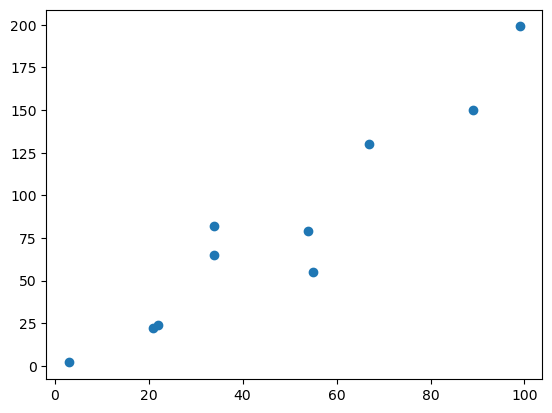

In [4]:
plt.scatter(x,y)

In [5]:
def model(a, b, x):
    return a*x + b

def loss_function(a, b, x, y):
    num = len(x)
    prediction=model(a,b,x)
    return (0.5/num) * (np.square(prediction-y)).sum()

def optimize(Lr, a,b,x,y):
    num = len(x)
    prediction = model(a,b,x)
    da = (1.0/num) * ((prediction -y)*x).sum()
    db = (1.0/num) * ((prediction -y).sum())
    a = a - Lr*da
    b = b - Lr*db
    return a, b

def iterate(Lr, a,b,x,y,times):
    for i in range(times):
        a,b = optimize(Lr, a,b,x,y)
    return a,b

In [6]:

gc = gspread.service_account(filename='unity-364412-884913d29871.json')
sh = gc.open("UnityTable").worksheet('Задание2')

[0.32445826]
[0.23472972]
[0.3289329] [0.23479478] 3357.9620131394886
[0.99212458] [0.24427777] 1089.8978832841947
[1.53412446] [0.25130145] 262.23222276455283
[1.71671431] [0.25223909] 191.1886598429976
[1.746712] [0.25023984] 189.52360196205345
[1.7492773] [0.24720969] 189.5033248763255


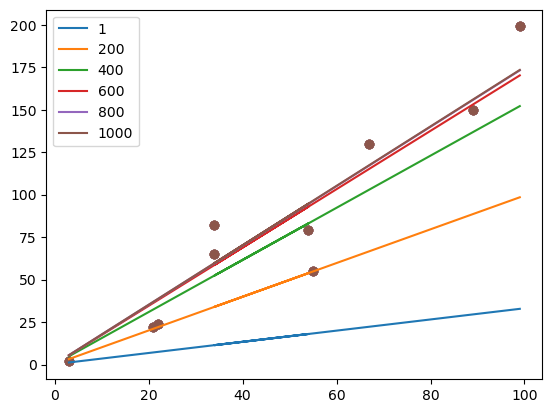

In [9]:
Lr = 0.000001
a_f = np.random.rand(1)
print(a_f)
b_f = np.random.rand(1)
print(b_f)

a = np.copy(a_f)
b = np.copy(b_f)
n_a = np.arange(1, 6) * 200
n_a = np.concatenate([[1], n_a])
a_loss = []

for i, n in enumerate(n_a):
    a,b = iterate(Lr, a, b, x, y, n)
    prediction=model(a,b,x)
    loss = loss_function(a, b, x, y)
    a_loss.append(loss)

    print(a,b,loss)
    sh.update(('A' + str(i+2)), str(n))
    sh.update(('B' + str(i+2)), f"{a[0]:.3f}".replace('.',','))
    sh.update(('C' + str(i+2)), f"{b[0]:.3f}".replace('.',','))
    sh.update(('D' + str(i+2)), f"{loss:.3f}".replace('.',','))

    plt.scatter(x,y)
    plt.plot(x,prediction, label=n)

plt.legend(loc='best')
plt.show()

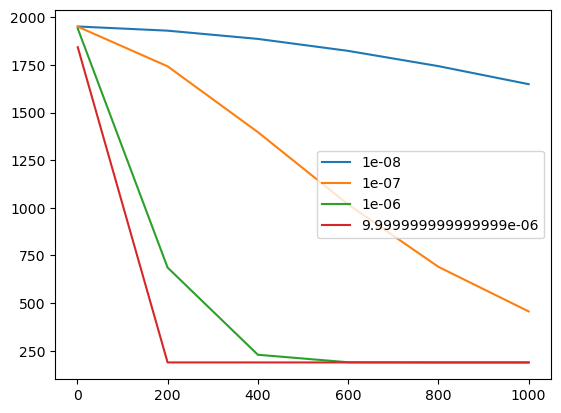

In [8]:
Lr = Lr * 0.01
for i in range (1, 5):
    a = np.copy(a_f)
    b = np.copy(b_f)
    a_loss = []
    for n in n_a:
        a,b = iterate(Lr, a,b,x,y, n)
        loss = loss_function(a, b, x, y)
        a_loss.append(loss)
    plt.plot(n_a, a_loss, label=Lr)
    Lr = Lr * 10

plt.legend(loc='best')
plt.show()